# Testing the trained weight matrices (not in an ensemble)

In [1]:
import nengo
import numpy as np
import cPickle
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.animation as animation
from scipy import linalg
%matplotlib inline
import scipy.ndimage

Load the weight matrices from the training

In [2]:
#Weight matrices generated by the neural network after training

#Maps the label vectors to the neuron activity of the ensemble
label_weights = cPickle.load(open("label_weights5000.p", "rb"))
#Maps the activity of the neurons to the visual representation of the image
activity_to_img_weights = cPickle.load(open("activity_to_img_weights5000.p", "rb"))
#Maps the activity of the neurons of an image with the activity of the neurons of an image rotated 6 degrees
#rotation_weights = cPickle.load(open("rotation_weights5000.p", "rb"))

#Create the pointers for the numbers
temp = np.diag([1]*10)

ZERO = temp[0]
ONE =  temp[1]
TWO =  temp[2]
THREE= temp[3]
FOUR = temp[4]
FIVE = temp[5]
SIX =  temp[6]
SEVEN =temp[7]
EIGHT= temp[8]
NINE = temp[9]

labels =[ZERO,ONE,TWO,THREE,FOUR,FIVE,SIX,SEVEN,EIGHT,NINE]

In [3]:
#Visualize the one hot representation
print(ZERO)
print(ONE)

[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


Visualize the digit from one hot representation through the activity weight matrix to the image representation
- Image is average digit from mnist dataset

In [4]:
def intense(img):
    newImg = img.copy()
    #for i in range(len(newImg)):
    #    newImg[i] = np.log (newImg[i] + 1.25)
    
    newImg[newImg < 0] = -1
    newImg[newImg > 0] = 1
    return newImg


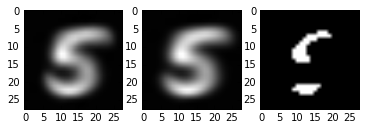

In [6]:
#Change this to imagine different digits
imagine = FIVE
#Can also imagine combitnations of numbers (ZERO + ONE)

#Label to activity
test_activity = np.dot(imagine,label_weights)
#Image decoded 
test_output_img = np.dot(test_activity, activity_to_img_weights)


#noise = np.random.random([28,28])
#test_output_img = noise+np.reshape(test_output_img,(28,28))

#clean = intense(test_output_img)

#clean = scipy.ndimage.median_filter(test_output_img, 3)
#clean = intense(clean)

clean = scipy.ndimage.gaussian_filter(test_output_img, sigma=1)
#clean = intense(clean)

#clean = scipy.ndimage.binary_opening(test_output_img)

#Edge detection?
#clean = scipy.ndimage.sobel(test_output_img, axis=0, mode='constant')

#Sharpening
#filter_blurred_f = scipy.ndimage.gaussian_filter(test_output_img, 1)
#alpha = 30
#clean = test_output_img + alpha * (test_output_img - filter_blurred_f)

plt.subplot(131)
plt.imshow(test_output_img.reshape(28,28),cmap='gray')
plt.subplot(132)
plt.imshow(clean.reshape(28,28),cmap='gray')


clean = intense(clean)
plt.subplot(133)
plt.imshow(clean.reshape(28,28),cmap='gray')
plt.show()


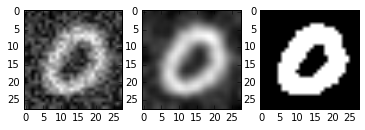

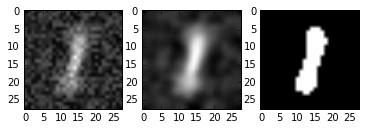

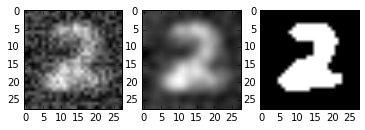

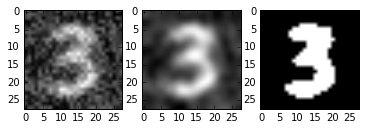

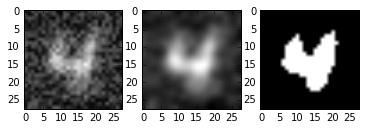

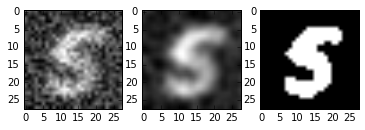

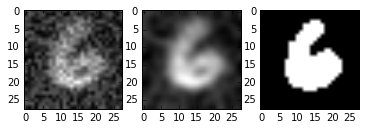

In [40]:
for i in range(7):
    imagine = labels[i]
    #Label to activity
    test_activity = np.dot(imagine,label_weights)
    #Image decoded 
    test_output_img = np.dot(test_activity, activity_to_img_weights)
    
    noise = np.random.random([28,28])
    test_output_img = noise+np.reshape(test_output_img,(28,28))

    plt.subplot(131)
    plt.imshow(test_output_img.reshape(28,28),cmap='gray')
    
    clean = scipy.ndimage.gaussian_filter(test_output_img, sigma=1)
    
    plt.subplot(132)
    plt.imshow(clean.reshape(28,28),cmap='gray')
    
    clean = intense(clean)
    plt.subplot(133)
    plt.imshow(clean.reshape(28,28),cmap='gray')
    plt.show()
    


Visualize the rotation of the image using the weight matrix from activity to activity
- does not use the weight matrix used on the recurrent connection

In [12]:
#Change this to visualize different digits
imagine = FIVE 

#How long the animation should go for
frames=60

#Make a list of the activation of rotated images and add first frame
rot_seq = []
rot_seq.append(np.dot(imagine,label_weights)) #Map the label vector to the activity vector
test_output_img = np.dot(rot_seq[0], activity_to_img_weights) #Map the activity to the visual representation

#add the rest of the frames, using the previous frame to calculate the current frame
for i in range(1,frames):
    rot_seq.append(np.dot(rot_seq[i-1],rotation_weights)) #add the activity of the current image to the list
    test_output_img = np.dot(rot_seq[i], activity_to_img_weights) #map the new activity to the visual image
    

#Animation of rotation
fig = plt.figure()

def updatefig(i):
    image_vector = np.dot(rot_seq[i], activity_to_img_weights) #map the activity to the image representation
    im = pylab.imshow(np.reshape(image_vector,(28,28), 'F').T, cmap=plt.get_cmap('Greys_r'),animated=True)
    
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

In [31]:
imagine = FIVE 
test_output_img = np.dot(imagine,label_weights) #Map the label vector to the activity vector
test_output_img = np.dot(test_output_img,rotation_weights)
test_output_img = np.dot(test_output_img,linalg.inv(rotation_weights))
test_output_img = np.dot(test_output_img, activity_to_img_weights) #Map the activity to the visual representation

pylab.imshow(np.reshape(test_output_img,(28,28), 'F').T, cmap=plt.get_cmap('Greys_r'))
plt.show()
